In [148]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits # 이 함수를 사용하면 손글씨 숫자 이미지 데이터셋을 가져올 수 있습니다.
digits=load_digits()
print(digits.data)



[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [149]:
print(digits.images[0]) #숫자 이미지들의 배열을 나타내는 속성입니다. digits.images[0]는 데이터셋에서 첫 번째 이미지를 나타냅니다. 따라서 이 코드는 첫 번째 이미지를 출력합니다.

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [150]:
print(digits.target[:])
 #digits.target은 숫자 이미지에 해당하는 정답 라벨들의 배열을 나타내는 속성입니다.
 #digits.target[5]는 데이터셋에서 여섯 번째 이미지의 정답 라벨을 나타냅니다.
 #따라서 이 코드는 여섯 번째 이미지의 정답 라벨을 출력합니다.

[0 1 2 ... 8 9 8]


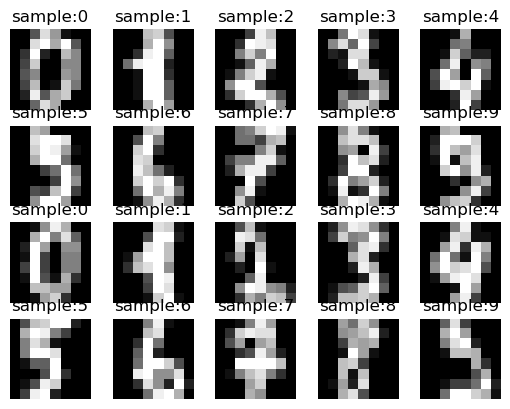

In [151]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:20]):
    plt.subplot(4,5, index+1)
    plt.axis('off')
    plt.imshow(image, cmap='gray')
    plt.title("sample:%i" % label)

In [152]:
x=digits.data
y=digits.target
print(x.shape)
print(y.shape)

(1797, 64)
(1797,)


In [153]:
import torch
import torch.nn as nn
import torch.optim as optim

In [154]:
model=nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,10)
)

In [155]:
X=torch.tensor(x, dtype=torch.float32)
Y=torch.tensor(y, dtype=torch.int64)


In [156]:
loss_fn=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters())


In [157]:
loss_list=[]
for epoch in range(1001):
    optimizer.zero_grad()
    y_hat=model(X)
    loss=loss_fn(y_hat,Y)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())

    if epoch%100==0:
        print(epoch, loss.item())

0 2.426417589187622
100 0.24429361522197723
200 0.06283783167600632
300 0.026960641145706177
400 0.013107653707265854
500 0.007334352005273104
600 0.004576351027935743
700 0.003081150585785508
800 0.0021983913611620665
900 0.0016184488777071238
1000 0.001232211128808558


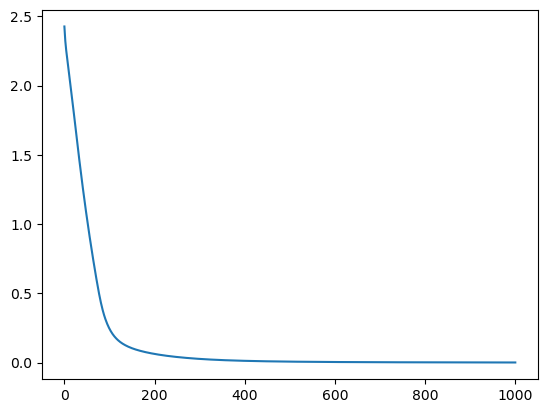

In [158]:
plt.plot(loss_list)

In [159]:
pred = model(X[[1]])
print(pred)
predicted=torch.argmax(pred)
print(predicted)
print(Y[1])

tensor([[-12.2888,  16.0632,  -4.2210,  -8.9493,   0.5745,  -3.7327,  -5.5192,
         -11.0047,  -0.2082,  -6.2560]], grad_fn=<AddmmBackward0>)
tensor(1)
tensor(1)


In [160]:
import numpy as np
from sklearn.datasets import fetch_openml

In [161]:
mnist=fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

c:\Users\omega\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [162]:
fashion_mnist=fetch_openml(name='Fashion-MNIST')

In [163]:
mnist.data[:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [164]:
mnist.data[:].shape

(70000, 784)

In [165]:
print(mnist.data.shape)
print(mnist.target.shape)


(70000, 784)
(70000,)


In [166]:
mnist.target=mnist.target.astype(np.int8)
mnist.target

array([5, 0, 4, ..., 4, 5, 6], dtype=int8)

In [167]:
x=mnist.data/255
y=mnist.target


In [168]:
print(x[0])
print(y[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

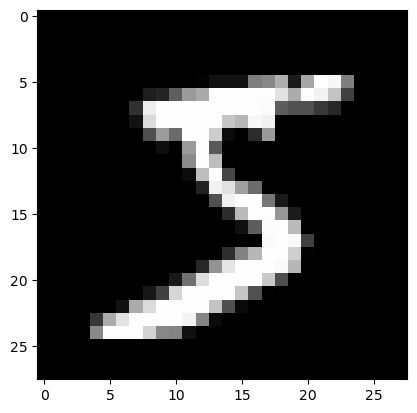

In [169]:
plt.imshow(x[0].reshape(28,28), cmap='gray')
# plt.title('image:', str(y[0]))
plt.show()

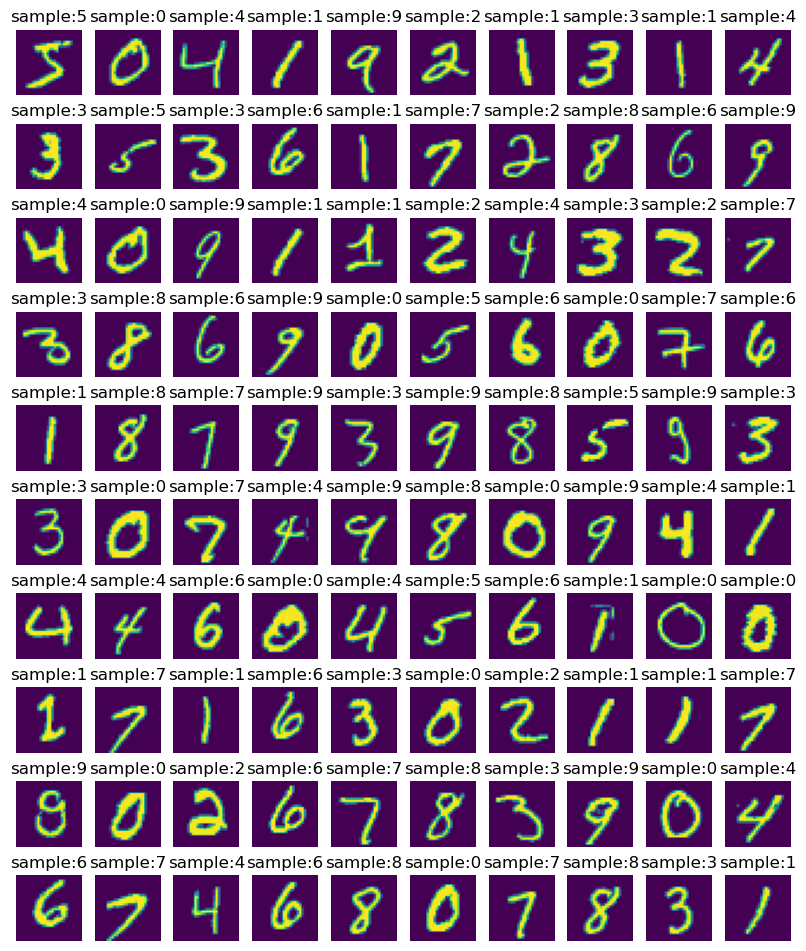

In [170]:
plt.figure(figsize=(10,12))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.axis('off')
    plt.imshow(x[i].reshape(28,28))
    plt.title(('sample:%i'%(y[i])))
plt.show()

In [171]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=1/7, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [179]:
X_train = torch.FloatTensor(x_train)
X_test = torch.FloatTensor(x_test)
Y_train = torch.LongTensor(y_train)
Y_test = torch.LongTensor(y_test)

In [180]:
from torch.utils.data import TensorDataset, DataLoader
from sklearn.datasets import fetch_openml

In [181]:
ds_train = TensorDataset(X_train, Y_train)
ds_test = TensorDataset(X_test, Y_test)
load_train = DataLoader(ds_train, batch_size=64, shuffle=True)
load_test = DataLoader(ds_test, batch_size=64, shuffle=True)


In [182]:
model=nn.Sequential()
model.add_module('fc1',nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2',nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3',nn.Linear(100, 100))
model.add_module('relu3', nn.ReLU())
model.add_module('fc4',nn.Linear(100, 10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=100, bias=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=100, out_features=10, bias=True)
)


In [183]:
loss_fn=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(), lr=0.1)
print(model.parameters())

<generator object Module.parameters at 0x000001EAA0232EA0>


In [184]:
costs=[]
accuracys=[]
epochs=[]

def train(epoch):
    model.train()
    cost=0
    accuracy=0

    for data, targets, in load_train:
        optimizer.zero_grad()
        output=model(data)
        loss=loss_fn(output, targets)
        _, y_hat = torch.max(output.data, 1) #확률이 가장 높은 레이블이 무엇인지 계산
        accuracy+=y_hat.eq(targets.data.view_as(y_hat)).sum()
        cost+=loss.item()
        loss.backward()
        optimizer.step()
    epochs.append(epoch)
    costs.append(cost)
    accuracys.append(accuracy.detach().numpy()/60000)
    print(epoch, cost, accuracy/60000)

In [185]:
def test():
    model.eval()
    correct=0

    with torch.no_grad():
        for data, targets  in load_test:
            output=model(data)
            _, predicted = torch.max(output, 1)
            correct+=predicted.eq(targets.data.view_as(predicted)).sum()
    data_num = len(load_test.dataset) #총 데이터 건수
    print('테스트 데이터에서의 예측 정확도 : ', data_num, 100*correct/data_num)

test()

테스트 데이터에서의 예측 정확도 :  10000 tensor(9.7600)


In [186]:
for epoch in range(20):
    train(epoch)
test()

0 311.07100423425436 tensor(0.9029)
1 121.20127434935421 tensor(0.9604)
2 83.57966917846352 tensor(0.9728)
3 64.19973532436416 tensor(0.9785)
4 51.771090704598464 tensor(0.9822)
5 42.79053600021871 tensor(0.9855)
6 35.72882315629977 tensor(0.9877)
7 29.23316146795696 tensor(0.9900)
8 27.379104824140086 tensor(0.9899)
9 22.42694282508819 tensor(0.9921)
10 21.46089786097582 tensor(0.9925)
11 19.28406302006624 tensor(0.9934)
12 15.702326841457761 tensor(0.9940)
13 17.427423586712393 tensor(0.9941)
14 15.656948834666764 tensor(0.9944)
15 12.724352673694739 tensor(0.9955)
16 10.643156807362175 tensor(0.9962)
17 12.67027616489645 tensor(0.9955)
18 11.775618302967814 tensor(0.9960)
19 11.916628067923057 tensor(0.9955)
테스트 데이터에서의 예측 정확도 :  10000 tensor(97.4000)


결과: tensor(4)
정답: tensor(4)


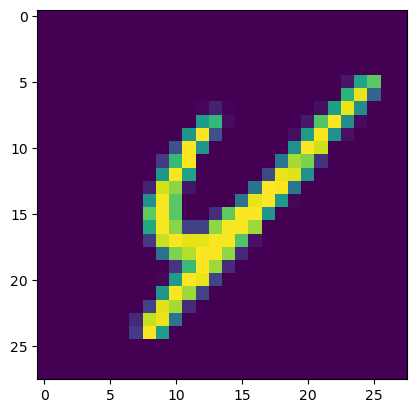

In [208]:
index=97
model.eval()
data=X_test[index]
output=model(data)
_, predicted=torch.max(output.data, 0)
print("결과:", predicted)
print("정답:", Y_test[97])

X_test_show=X_test[index].numpy()
plt.imshow(X_test_show.reshape(28,28))
plt.show()

In [222]:
predicteds = model(X_test)
predicted_list = []

for i in range(len(predicteds)):
    v, index = torch.max(predicteds[i],0)
    predicted_list.append(index.item())
predicted = torch.from_numpy(np.array(predicted_list))
print(predicted)
print(Y_test)

tensor([0, 4, 1,  ..., 1, 3, 0], dtype=torch.int32)
tensor([0, 4, 1,  ..., 1, 3, 0])


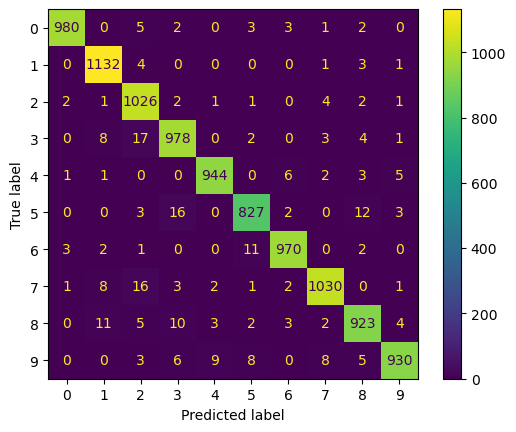

In [224]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(Y_test, predicted)
ConfusionMatrixDisplay(cm).plot()